In [37]:
import geopandas as gpd
import pandas as pd

In [38]:
data = gpd.read_file('data\Crime_Incidents_in_2018.shp')
grid = gpd.read_file('data\Washington_DC_Boundary.shp')

In [39]:
grid.columns

Index(['OBJECTID', 'CITY_NAME', 'STATE_CITY', 'CAPITAL', 'WEB_URL', 'AREAKM',
       'AREAMILES', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [40]:
data.columns

Index(['CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'XBLOCK',
       'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHO', 'BLOCK_GROU',
       'CENSUS_TRA', 'VOTING_PRE', 'LATITUDE', 'LONGITUDE', 'BID',
       'START_DATE', 'END_DATE', 'OBJECTID', 'OCTO_RECOR', 'geometry'],
      dtype='object')

In [41]:
print(grid.crs)
print(data.crs)

epsg:4326
epsg:4326


In [42]:
from pyproj import CRS
wkt = """GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
wgs_84 = CRS.from_wkt(wkt)

In [43]:
type(wgs_84)

pyproj.crs.crs.CRS

In [44]:
wgs_84

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
grid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
assert grid.crs == data.crs, "Referencing system doesn't match, please update the CRS"

In [48]:
grid.head()

,OBJECTID,CITY_NAME,STATE_CITY,CAPITAL,WEB_URL,AREAKM,AREAMILES,Shape_Leng,Shape_Area,geometry
0,1,Washington,1150000,Y,http://www.dc.gov,177.47,68.52,67608.276922,1.774562e+08,"POLYGON ((-77.11980 38.93435, -77.11979 38.934..."


In [49]:
data.head()

,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,...,CENSUS_TRA,VOTING_PRE,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECOR,geometry
0,18171105,2018-10-09T13:37:09.000Z,DAY,OTHERS,THEFT F/AUTO,1621 - 1699 BLOCK OF NORTH CAPITOL STREET,399215.0,138262.0,5,5E,...,003302,Precinct 19,38.912221,-77.009051,None,2018-10-09T12:57:53.000Z,None,314491319,18171105-01,POINT (-77.00905 38.91223)
1,18171107,2018-10-09T13:53:19.000Z,DAY,OTHERS,THEFT F/AUTO,800 - 899 BLOCK OF 7TH STREET NE,400332.0,136990.0,6,6C,...,010600,Precinct 83,38.900763,-76.996173,None,2018-10-09T11:50:26.000Z,2018-10-09T12:45:32.000Z,314491320,18171107-01,POINT (-76.99617 38.90077)
2,18171110,2018-10-09T13:36:09.000Z,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF 7TH STREET NW,398099.0,138058.0,6,6E,...,004901,Precinct 18,38.910382,-77.021918,None,2018-10-09T12:50:37.000Z,None,314491321,18171110-01,POINT (-77.02192 38.91039)
3,18171115,2018-10-09T14:13:15.000Z,DAY,OTHERS,THEFT/OTHER,1 - 99 BLOCK OF L STREET NE,399351.0,137319.0,6,6C,...,010600,Precinct 83,38.903727,-77.007482,NOMA,2018-10-09T13:02:17.000Z,2018-10-09T13:44:17.000Z,314491322,18171115-01,POINT (-77.00748 38.90373)
4,18171117,2018-10-09T13:50:01.000Z,DAY,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 5TH STREET NE,400212.0,137949.0,5,5D,...,008803,Precinct 76,38.909402,-76.997556,None,2018-10-06T12:05:26.000Z,2018-10-06T15:15:35.000Z,314491323,18171117-01,POINT (-76.99756 38.90941)


In [50]:
len(data)

33643

In [51]:
data.columns

Index(['CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'XBLOCK',
       'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHO', 'BLOCK_GROU',
       'CENSUS_TRA', 'VOTING_PRE', 'LATITUDE', 'LONGITUDE', 'BID',
       'START_DATE', 'END_DATE', 'OBJECTID', 'OCTO_RECOR', 'geometry'],
      dtype='object')

In [52]:
data = data[['CCN', 'REPORT_DAT', 'BLOCK','XBLOCK','YBLOCK','geometry']]

In [53]:
data.head()

,CCN,REPORT_DAT,BLOCK,XBLOCK,YBLOCK,geometry
0,18171105,2018-10-09T13:37:09.000Z,1621 - 1699 BLOCK OF NORTH CAPITOL STREET,399215.0,138262.0,POINT (-77.00905 38.91223)
1,18171107,2018-10-09T13:53:19.000Z,800 - 899 BLOCK OF 7TH STREET NE,400332.0,136990.0,POINT (-76.99617 38.90077)
2,18171110,2018-10-09T13:36:09.000Z,1500 - 1599 BLOCK OF 7TH STREET NW,398099.0,138058.0,POINT (-77.02192 38.91039)
3,18171115,2018-10-09T14:13:15.000Z,1 - 99 BLOCK OF L STREET NE,399351.0,137319.0,POINT (-77.00748 38.90373)
4,18171117,2018-10-09T13:50:01.000Z,1300 - 1399 BLOCK OF 5TH STREET NE,400212.0,137949.0,POINT (-76.99756 38.90941)


In [54]:
data.dtypes

CCN             object
REPORT_DAT      object
BLOCK           object
XBLOCK         float64
YBLOCK         float64
geometry      geometry
dtype: object

In [55]:
data['REPORT_DAT'] = data['REPORT_DAT'].apply(lambda x : x[0:10])

In [56]:
data.head()

,CCN,REPORT_DAT,BLOCK,XBLOCK,YBLOCK,geometry
0,18171105,2018-10-09,1621 - 1699 BLOCK OF NORTH CAPITOL STREET,399215.0,138262.0,POINT (-77.00905 38.91223)
1,18171107,2018-10-09,800 - 899 BLOCK OF 7TH STREET NE,400332.0,136990.0,POINT (-76.99617 38.90077)
2,18171110,2018-10-09,1500 - 1599 BLOCK OF 7TH STREET NW,398099.0,138058.0,POINT (-77.02192 38.91039)
3,18171115,2018-10-09,1 - 99 BLOCK OF L STREET NE,399351.0,137319.0,POINT (-77.00748 38.90373)
4,18171117,2018-10-09,1300 - 1399 BLOCK OF 5TH STREET NE,400212.0,137949.0,POINT (-76.99756 38.90941)


In [57]:
data['REPORT_DAT'] = pd.to_datetime(data['REPORT_DAT'], format='%Y-%m-%d')

In [58]:
data.dtypes

CCN                   object
REPORT_DAT    datetime64[ns]
BLOCK                 object
XBLOCK               float64
YBLOCK               float64
geometry            geometry
dtype: object

In [59]:
data['MONTH'] = pd.DatetimeIndex(data['REPORT_DAT']).month

In [60]:
data.head()

,CCN,REPORT_DAT,BLOCK,XBLOCK,YBLOCK,geometry,MONTH
0,18171105,2018-10-09,1621 - 1699 BLOCK OF NORTH CAPITOL STREET,399215.0,138262.0,POINT (-77.00905 38.91223),10
1,18171107,2018-10-09,800 - 899 BLOCK OF 7TH STREET NE,400332.0,136990.0,POINT (-76.99617 38.90077),10
2,18171110,2018-10-09,1500 - 1599 BLOCK OF 7TH STREET NW,398099.0,138058.0,POINT (-77.02192 38.91039),10
3,18171115,2018-10-09,1 - 99 BLOCK OF L STREET NE,399351.0,137319.0,POINT (-77.00748 38.90373),10
4,18171117,2018-10-09,1300 - 1399 BLOCK OF 5TH STREET NE,400212.0,137949.0,POINT (-76.99756 38.90941),10


In [61]:
data['MONTH'].nunique()

12

In [62]:
data['MONTH'].value_counts()

8     3326
10    3279
9     3161
7     3137
12    2889
11    2850
6     2839
5     2731
1     2532
4     2409
3     2304
2     2186
Name: MONTH, dtype: int64

<AxesSubplot:title={'center':'CASES PER MONTH'}, xlabel='Months', ylabel='Cases'>

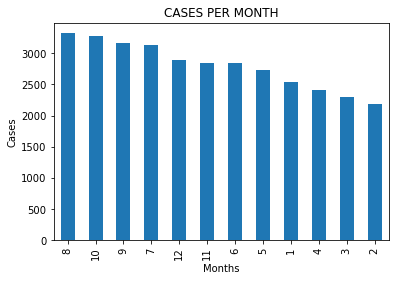

In [63]:
from matplotlib import pyplot as plt
plt.title('CASES PER MONTH')
plt.xlabel('Months')
plt.ylabel('Cases')
data['MONTH'].value_counts().plot(kind='bar')

In [64]:
data = data.dissolve(by='MONTH')

In [65]:
data

,geometry,CCN,REPORT_DAT,BLOCK,XBLOCK,YBLOCK
MONTH,,,,,,
1,"MULTIPOINT (-77.10995 38.93344, -77.10826 38.9...",16208156,2018-01-05,4916 - 5067 BLOCK OF JAY STREET NE,406139.0,137111.0
2,"MULTIPOINT (-77.11232 38.93489, -77.10946 38.9...",18400190,2018-02-04,2300 - 2399 BLOCK OF 18TH STREET NW,396370.0,139140.0
3,"MULTIPOINT (-77.10935 38.92961, -77.10738 38.9...",17003498,2018-03-20,3030 - 3299 BLOCK OF BUENA VISTA TERRACE SE,402985.0,131495.0
4,"MULTIPOINT (-77.10904 38.93574, -77.10262 38.9...",10954295,2018-04-05,3810 - 3899 BLOCK OF RESERVOIR ROAD NW,393499.0,138307.0
5,"MULTIPOINT (-77.11196 38.93876, -77.10904 38.9...",18082247,2018-05-22,3319 - 3499 BLOCK OF CONNECTICUT AVENUE NW,394964.0,140772.0
6,"MULTIPOINT (-77.10904 38.93574, -77.10419 38.9...",18087840,2018-06-01,900 - 999 BLOCK OF F STREET NW,397834.0,136610.0
7,"MULTIPOINT (-77.10158 38.94221, -77.09927 38.9...",07006630,2018-07-26,3100 3198 BLOCK OF 24TH STREET SE,402412.0,131645.0
8,"MULTIPOINT (-77.10904 38.93574, -77.10819 38.9...",18118863,2018-08-01,1500 - 1599 BLOCK OF 4TH STREET NW,398597.0,138057.0
9,"MULTIPOINT (-77.11232 38.93489, -77.10678 38.9...",18164756,2018-09-29,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,400541.0,139301.0


In [66]:
data.reset_index(inplace=True)

In [67]:
data

,MONTH,geometry,CCN,REPORT_DAT,BLOCK,XBLOCK,YBLOCK
0,1,"MULTIPOINT (-77.10995 38.93344, -77.10826 38.9...",16208156,2018-01-05,4916 - 5067 BLOCK OF JAY STREET NE,406139.0,137111.0
1,2,"MULTIPOINT (-77.11232 38.93489, -77.10946 38.9...",18400190,2018-02-04,2300 - 2399 BLOCK OF 18TH STREET NW,396370.0,139140.0
2,3,"MULTIPOINT (-77.10935 38.92961, -77.10738 38.9...",17003498,2018-03-20,3030 - 3299 BLOCK OF BUENA VISTA TERRACE SE,402985.0,131495.0
3,4,"MULTIPOINT (-77.10904 38.93574, -77.10262 38.9...",10954295,2018-04-05,3810 - 3899 BLOCK OF RESERVOIR ROAD NW,393499.0,138307.0
4,5,"MULTIPOINT (-77.11196 38.93876, -77.10904 38.9...",18082247,2018-05-22,3319 - 3499 BLOCK OF CONNECTICUT AVENUE NW,394964.0,140772.0
5,6,"MULTIPOINT (-77.10904 38.93574, -77.10419 38.9...",18087840,2018-06-01,900 - 999 BLOCK OF F STREET NW,397834.0,136610.0
6,7,"MULTIPOINT (-77.10158 38.94221, -77.09927 38.9...",07006630,2018-07-26,3100 3198 BLOCK OF 24TH STREET SE,402412.0,131645.0
7,8,"MULTIPOINT (-77.10904 38.93574, -77.10819 38.9...",18118863,2018-08-01,1500 - 1599 BLOCK OF 4TH STREET NW,398597.0,138057.0
8,9,"MULTIPOINT (-77.11232 38.93489, -77.10678 38.9...",18164756,2018-09-29,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,400541.0,139301.0
9,10,"MULTIPOINT (-77.10904 38.93574, -77.10826 38.9...",18171105,2018-10-09,1621 - 1699 BLOCK OF NORTH CAPITOL STREET,399215.0,138262.0


In [68]:
type(data)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

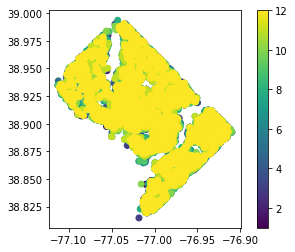

In [69]:
data.plot(column='MONTH', k=12, legend=True)

In [72]:
data.columns

Index(['MONTH', 'geometry', 'CCN', 'REPORT_DAT', 'BLOCK', 'XBLOCK', 'YBLOCK'], dtype='object')

In [73]:
data = data[['MONTH', 'geometry', 'CCN', 'BLOCK', 'XBLOCK', 'YBLOCK']]

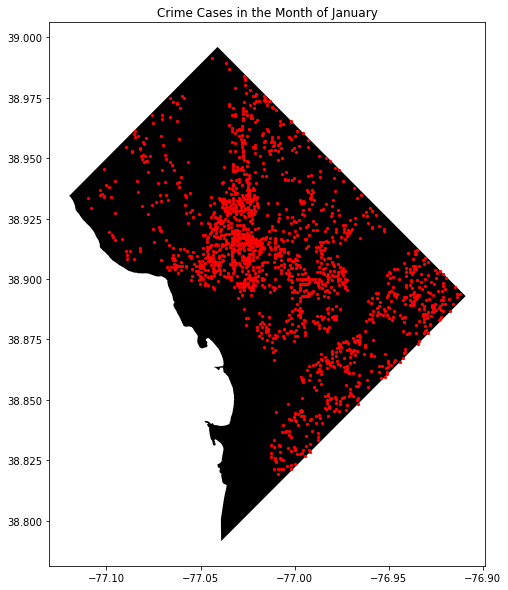

In [75]:
fig, axis = plt.subplots(1,1,figsize=(10,10))
month = 'January'
plt.title('Crime Cases in the Month of January')
grid.plot(ax=axis, color='k')
data[0:1].plot(ax=axis,color='red', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

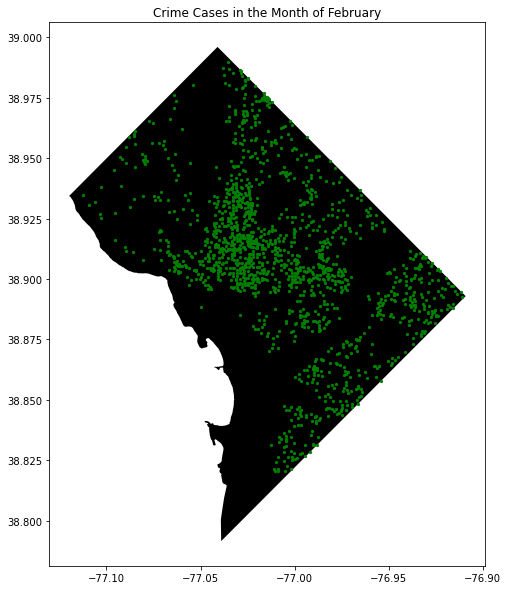

In [87]:
month = 'February'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of February')
grid.plot(ax=axis, color='k')
data[1:2].plot(ax=axis,color='green', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

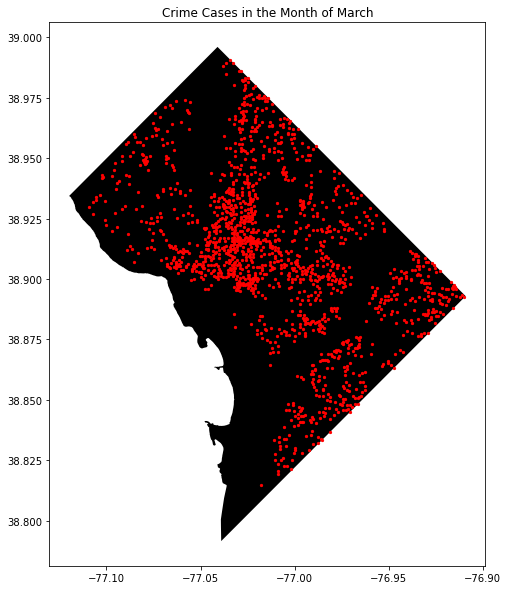

In [77]:
month = 'March'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of March')
grid.plot(ax=axis, color='k')
data[2:3].plot(ax=axis,color='red', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

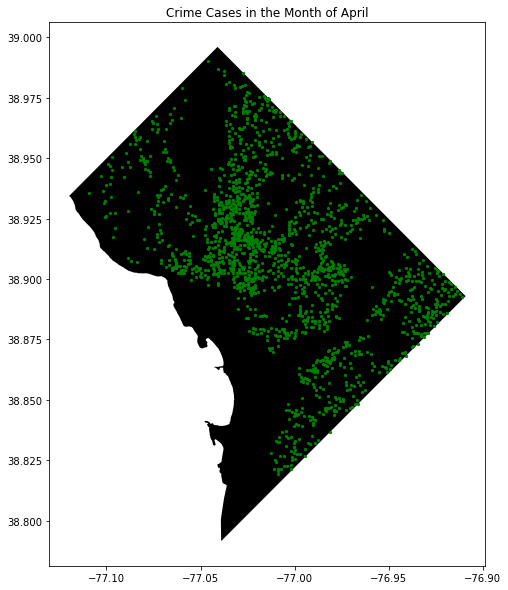

In [88]:
month = 'April'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of April')
grid.plot(ax=axis, color='k')
data[3:4].plot(ax=axis,color='green', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

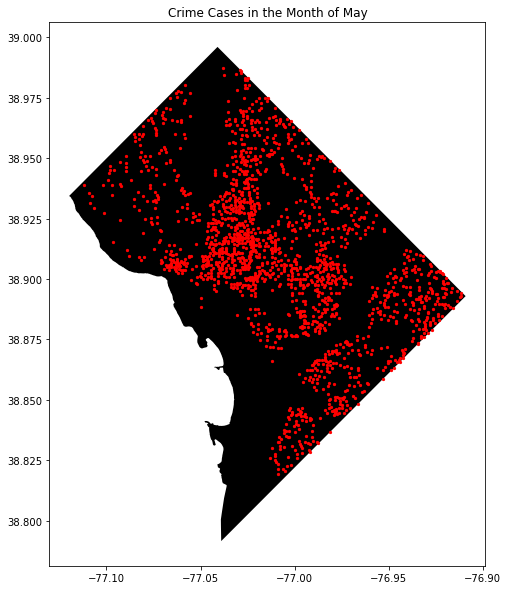

In [79]:
month = 'May'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of May')
grid.plot(ax=axis, color='k')
data[4:5].plot(ax=axis,color='red', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

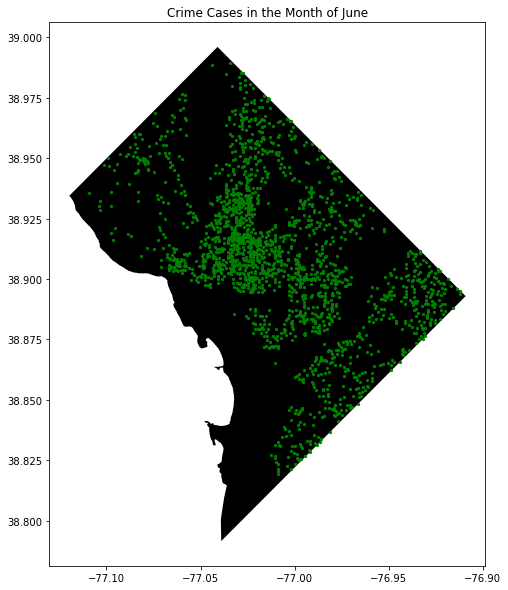

In [89]:
month = 'June'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of June')
grid.plot(ax=axis, color='k')
data[5:6].plot(ax=axis,color='green', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

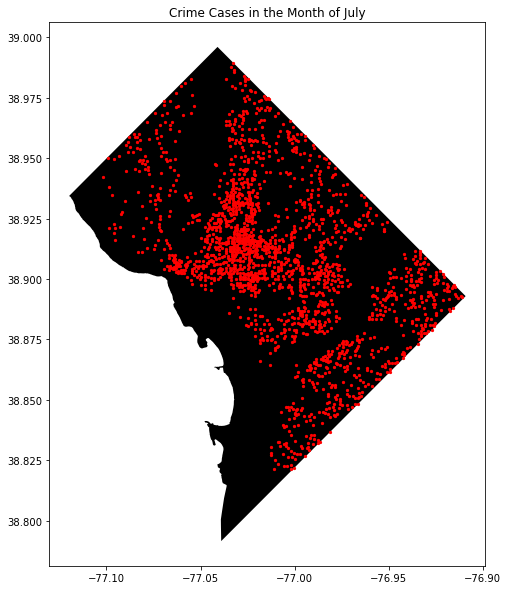

In [81]:
month = 'July'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of July')
grid.plot(ax=axis, color='k')
data[6:7].plot(ax=axis,color='red', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

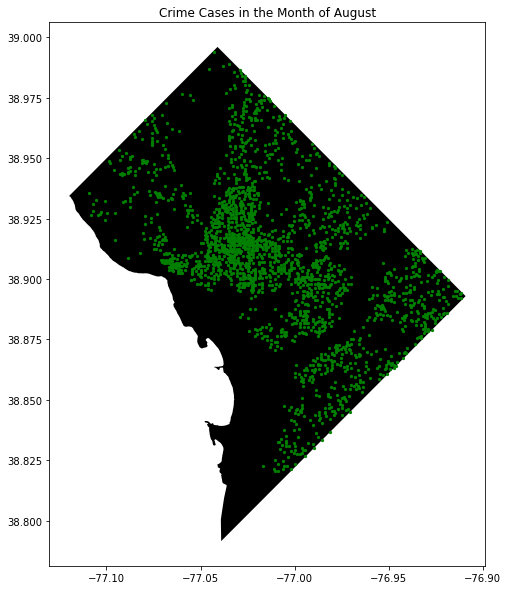

In [90]:
month = 'August'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of August')
grid.plot(ax=axis, color='k')
data[7:8].plot(ax=axis,color='green', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

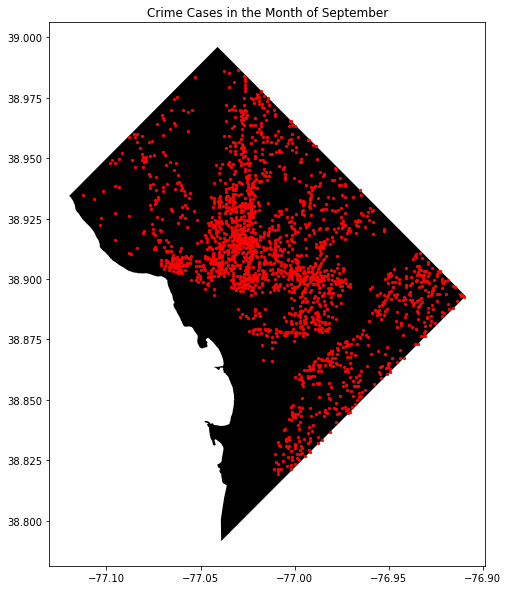

In [83]:
month = 'September'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of September')
grid.plot(ax=axis, color='k')
data[8:9].plot(ax=axis,color='red', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

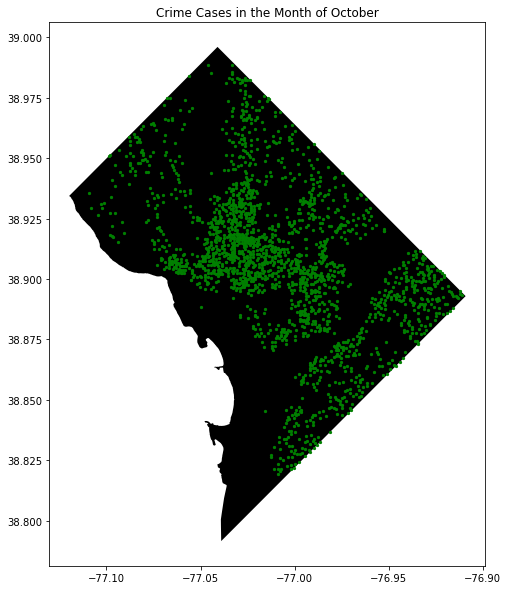

In [91]:
month = 'October'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of October')
grid.plot(ax=axis, color='k')
data[9:10].plot(ax=axis,color='green', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

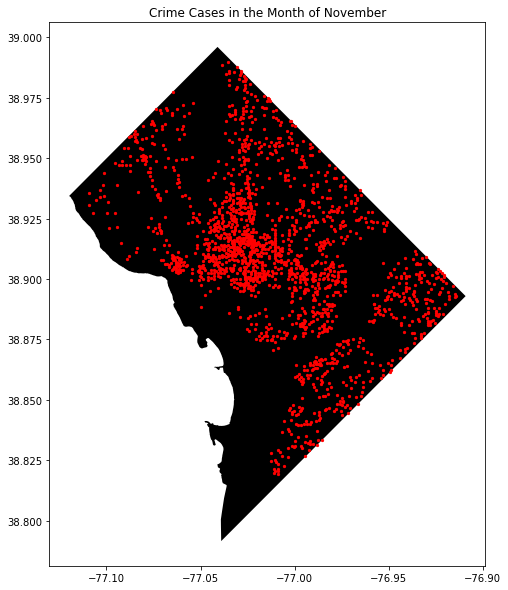

In [85]:
month = 'November'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of November')
grid.plot(ax=axis, color='k')
data[10:11].plot(ax=axis,color='red', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))

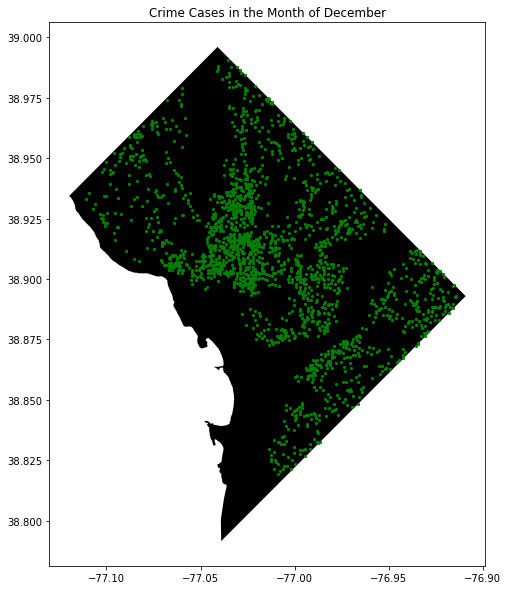

In [92]:
month = 'December'
fig, axis = plt.subplots(1,1,figsize=(10,10))
plt.title('Crime Cases in the Month of December')
grid.plot(ax=axis, color='k')
data[11:12].plot(ax=axis,color='green', markersize=5, legend=True)
data.to_file('geojson\CasesIn{}.geojson'.format(month), driver='GeoJSON')
plt.savefig('jpg\CasesIn{}.jpg'.format(month))
data.to_file('esrishp\CasesIn{}.shp'.format(month))